<a href="https://colab.research.google.com/github/AIS-SG/ai_lab_224n_NLP/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스(Keras)로 RNN 구현하기

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### 출력값이 (batch_size, output_dim) 크기의 2D 텐서일 떄, output_dimd은 hidden_size의 값인 3입니다.

#### 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 된다.

In [4]:
# batch_size를 미리 정의
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [5]:
# (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


# 파이썬으로 RNN 구현하기

$$ h_t = tanh(W_xX_t + W_hh_{t-1} + b) $$

In [6]:
# 아래의 코드는 의사 코드(pseudocode)로 실제 동작하는 코드가 아님. 

hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.

NameError: ignored

- input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 할성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산

In [7]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [8]:
print(hidden_state_t)
# 8의 크기를 가지는 은닉 상태. 현재는 초기 은닉 상태로 모든 차원이 0의 값을 가짐.

[0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# 가중치와 편향 정의

Wx = np.random.random((hidden_size, input_dim))  
# (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) 
# (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) 
# (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [10]:
print(np.shape(Wx)) # (8,4)
print(np.shape(Wh)) # (8,8)
print(np.shape(b)) # (8,)

(8, 4)
(8, 8)
(8,)


In [11]:
# RNN 층 동작
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) 
  # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) 
  # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) 
  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) 
# (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.95547972 0.90902415 0.92966985 0.9414954  0.78944766 0.86465435
  0.91257602 0.90299818]
 [0.99997039 0.99878217 0.99995495 0.99999877 0.99999443 0.99991387
  0.99974611 0.99964576]
 [0.999991   0.99970602 0.99999257 0.9999998  0.9999988  0.99997581
  0.9999545  0.99992558]
 [0.99999471 0.999634   0.99999727 0.99999977 0.99999892 0.9999758
  0.99996753 0.99996552]
 [0.99999103 0.99942345 0.99999364 0.9999993  0.99999922 0.99995984
  0.99996303 0.9999594 ]
 [0.99999604 0.99983088 0.99999735 0.9999998  0.99999955 0.99998539
  0.99998283 0.99997431]
 [0.9999902  0.99935662 0.99999466 0.99999946 0.99999875 0.99995612
  0.9999563  0.99995747]
 [0.99999799 0.99981596 0.99999595 0.99999986 0.9999997  0.99999105
  0.99996987 0.99993822]
 [0.99999736 0.99982646 0.99999749 0.99999984 0.99999962 0.99998853
  0.99998003 0.99996827]
 [0.99998092 0.99889977 0.99997273 0.9999989  0.9999988  0.99993395
  0.99990045 0.9998623 ]]

# RNN을 이용한 텍스트 생성

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

# 예제로 언급한 3개의 한국어 문장을 저장
text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

# 단어 집합을 생성하고 크기를 확인
t = Tokenizer()
t.fit_on_texts([text])
vocab_size = len(t.word_index) + 1
# 케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만,
# 케라스 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
# 배열의 크기를 실제 단어 집합의 크기보다 +1로 생성해야하므로 미리 +1 선언 
print('단어 집합의 크기 : %d' % vocab_size) # 단어 집합의 크기 : 12

# 각 단어와 단어에 부여된 정수 인덱스 출력
print(t.word_index)
# {'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


단어 집합의 크기 : 12
{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [13]:
# 훈련 데이터 만들기
sequences = list()
for line in text.split('\n'): # Wn을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences)) # 학습에 사용할 샘플의 개수: 11

print(sequences)
# [[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


학습에 사용할 샘플의 개수: 11
[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [19]:
# 전체 샘플에 대해서 길이를 일치 시켜주기
max_len=max(len(l) for l in sequences) #모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len)) # 샘플의 최대 길이 : 6 

# 전체 샘플의 길이를 6으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)

# 레이블 분리
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]
# 리스트의 마지막 값을 제외하고 저장한 것은 X
# 리스트의 마지막 값만 저장한 것은 y. 이는 레이블에 해당됨
print(X)
print(y) # 모든 샘플에 대한 레이블 출력

샘플의 최대 길이 : 6
[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]]
[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [20]:
# 원-핫 인코딩 수행
y = to_categorical(y, num_classes=vocab_size)
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### 모델 설계하기 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

# 임베딩 벡터는 10차원을 가지고 32의 은닉 상태 크기를 가지는 바닐라 RNN을 사용
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1)) # 레이블을 분리하였으므로 이제 X의 길이는 5
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 2.4671 - accuracy: 0.2727
Epoch 2/200
1/1 - 0s - loss: 2.4549 - accuracy: 0.2727
Epoch 3/200
1/1 - 0s - loss: 2.4426 - accuracy: 0.3636
Epoch 4/200
1/1 - 0s - loss: 2.4302 - accuracy: 0.4545
Epoch 5/200
1/1 - 0s - loss: 2.4175 - accuracy: 0.4545
Epoch 6/200
1/1 - 0s - loss: 2.4044 - accuracy: 0.5455
Epoch 7/200
1/1 - 0s - loss: 2.3909 - accuracy: 0.5455
Epoch 8/200
1/1 - 0s - loss: 2.3767 - accuracy: 0.5455
Epoch 9/200
1/1 - 0s - loss: 2.3620 - accuracy: 0.5455
Epoch 10/200
1/1 - 0s - loss: 2.3465 - accuracy: 0.5455
Epoch 11/200
1/1 - 0s - loss: 2.3304 - accuracy: 0.5455
Epoch 12/200
1/1 - 0s - loss: 2.3134 - accuracy: 0.5455
Epoch 13/200
1/1 - 0s - loss: 2.2955 - accuracy: 0.4545
Epoch 14/200
1/1 - 0s - loss: 2.2768 - accuracy: 0.4545
Epoch 15/200
1/1 - 0s - loss: 2.2572 - accuracy: 0.4545
Epoch 16/200
1/1 - 0s - loss: 2.2368 - accuracy: 0.3636
Epoch 17/200
1/1 - 0s - loss: 2.2154 - accuracy: 0.3636
Epoch 18/200
1/1 - 0s - loss: 2.1932 - accuracy: 0.3636
E

In [25]:
def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

print(sentence_generation(model, t, '경마장에', 4))
# '경마장에' 라는 단어 뒤에는 총 4개의 단어가 있으므로 4번 예측

print(sentence_generation(model, t, '그의', 2)) #   2번 예측

print(sentence_generation(model, t, '가는', 5)) # 5번 예측

경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다


# LSTM을 이용하여 텍스트 생성하기

### 데이터에 대한 이해와 전처리

In [27]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.utils import to_categorical

df=pd.read_csv('ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [28]:
print('열의 개수: ',len(df.columns))
print(df.columns)

열의 개수:  15
Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')


In [29]:
# Null 값이 존재하는 지 확인
df['headline'].isnull().values.any()

False

In [30]:
headline = [] # 리스트 선언
headline.extend(list(df.headline.values)) # 헤드라인의 값들을 리스트로 저장
headline[:5] # 상위 5개만 출력

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [32]:
# Unknown 값을 가진 샘플이 있어서 Null값은 아니지만 노이즈 데이터이므로 제거해줄 필요가 있다.
# 제거하기 전에 현재 샘플의 개수를 확인해보고 제거 전, 후의 샘플의 개수 비교
print('총 샘플의 개수 : {}'.format(len(headline))) # 현재 샘플의 개수 : 1324

headline = [n for n in headline if n != "Unknown"] # Unknown 값을 가진 샘플 제거
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline))) # 제거 후 샘플의 개수 : 1214

headline[:5]

총 샘플의 개수 : 1214
노이즈값 제거 후 샘플의 개수 : 1214


['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [33]:
# 선택한 전처리는 구두점 제거와 단어의 소문자화입니다.
# 전처리를 수행하고, 다시 샘플 5개를 출력한다.

def repreprocessing(s):
    s=s.encode("utf8").decode("ascii",'ignore')
    return ''.join(c for c in s if c not in punctuation).lower() # 구두점 제거와 동시에 소문자화

text = [repreprocessing(x) for x in headline]
text[:5]

# 기존의 출력과 비교하면 모든 단어들이 소문자화되었으며 N.F.L.이나 Cheerleaders 등과 같이 기존에 구두점이 붙어있던 단어들에서 구두점 제거

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [34]:
# 단어 집합을 만들고 크기 비교
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size) # 단어 집합의 크기 : 3494

단어 집합의 크기 : 3494


In [35]:
# 훈련 데이터 구성
sequences = list()

for line in text: # 1,214 개의 샘플에 대해서 샘플을 1개씩 가져온다.
    encoded = t.texts_to_sequences([line])[0] # 각 샘플에 대한 정수 인코딩
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11] # 11개의 샘플 출력

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [36]:
# 어떤 정수가 어떤 단어를 의미하는지 알아보기 위해 인덱스로부터 단어를 찾는 index_to_word를 만든다
index_to_word={}
for key, value in t.word_index.items(): 
  # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
  index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))
# 빈도수 상위. 582번 단어 : offer

빈도수 상위 582번 단어 : offer


In [41]:
# y데이터를 분리하기 전에 전체 샘플의 길이를 동일하게 만드는 패딩 작업을 수행
# 패딩 작업을 수행하기 전에 가장 긴 샘플의 길이를 확인

max_len=max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))
# 샘플의 최대 길이 : 24

#padding='pre'를 설정하면 샘플의 길이가 24보다 짧은 경우에 앞에 0으로 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

샘플의 최대 길이 : 24
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [44]:
# 맨 우측 단어만 레이블로 분리한다.
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X[:3])
# 맨 우측에 있던 정수값 269, 371, 1115가 사라진 것을 볼 수 있다.
# 각 샘플의 길이가 24에서 23으로 줄었다.

print(y[:3]) # 레이블
# [ 269 317 1115]
# 기존 훈련 데이터에서 맨 우측에 있던 정수들이 별도로 저장됨

# 레이블 데이터 y에 대해서 원-핫 인코딩을 수행
y = to_categorical(y, num_classes=vocab_size)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]
[ 269  371 1115]


### 모델 설계하기

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
# y데이터를 분리하였으므로 이제 X데이터의 길이는 기존 데이터의 길이 - 1
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 7s - loss: 7.6370 - accuracy: 0.0287
Epoch 2/200
244/244 - 7s - loss: 7.1113 - accuracy: 0.0308
Epoch 3/200
244/244 - 7s - loss: 6.9760 - accuracy: 0.0329
Epoch 4/200
244/244 - 7s - loss: 6.8558 - accuracy: 0.0424
Epoch 5/200
244/244 - 7s - loss: 6.7061 - accuracy: 0.0423
Epoch 6/200
244/244 - 7s - loss: 6.5344 - accuracy: 0.0500
Epoch 7/200
244/244 - 7s - loss: 6.3412 - accuracy: 0.0523
Epoch 8/200
244/244 - 7s - loss: 6.1318 - accuracy: 0.0579
Epoch 9/200
244/244 - 7s - loss: 5.9313 - accuracy: 0.0672
Epoch 10/200
244/244 - 7s - loss: 5.7395 - accuracy: 0.0691
Epoch 11/200
244/244 - 7s - loss: 5.5555 - accuracy: 0.0755
Epoch 12/200
244/244 - 7s - loss: 5.3844 - accuracy: 0.0792
Epoch 13/200
244/244 - 7s - loss: 5.2232 - accuracy: 0.0824
Epoch 14/200
244/244 - 7s - loss: 5.0683 - accuracy: 0.0933
Epoch 15/200
244/244 - 7s - loss: 4.9202 - accuracy: 0.0969
Epoch 16/200
244/244 - 7s - loss: 4.7777 - accuracy: 0.1088
Epoch 17/200
244/244 - 7s - loss: 4.6437 - accura

In [46]:
# 각 단어의 임베딩 벡터는 10차원을 가지고, 128의 은닉 상태 크기를 가지는 LSTM을 사용한다.
# 문장을 생성하는 함수 sentence_generation을 만들어서 문장을 생성

def sentence_generation(model, t, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
    sentence = ''
    for _ in range(n): # n번 반복
        encoded = t.texts_to_sequences([current_word])[0] # 현재 단어에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=23, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose=0)
    # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        for word, index in t.word_index.items(): 
            if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
                break # 해당 단어가 예측 단어이므로 break
        current_word = current_word + ' '  + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        sentence = sentence + ' ' + word # 예측 단어를 문장에 저장
    # for문이므로 이 행동을 다시 반복
    sentence = init_word + sentence
    return sentence

print(sentence_generation(model, t, 'i', 10))
# 임의의 단어 'i'에 대해서 10개의 단어를 추가 생성

print(sentence_generation(model, t, 'how', 10))
# 임의의 단어 'how'에 대해서 10개의 단어를 추가 생성

# 글자 단위 RNN 언어 모델

### 데이터에 대한 이해와 전처리

In [50]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")
f = open('11-0.txt', 'rb')
lines=[]
for line in f: # 데이터를 한 줄씩 읽는다.
    line=line.strip() # strip()을 통해 \r, \n을 제거한다.
    line=line.lower() # 소문자화.
    line=line.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(line) > 0:
        lines.append(line)
f.close()

In [51]:
# 간단한 전처리가 수행된 lines란 이름의 리스트에 저장
# 리스트에서 5개의 원소만 출력
lines[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and most',
 'other parts of the world at no cost and with almost no restrictions',
 'whatsoever.  you may copy it, give it away or re-use it under the terms of',
 'the project gutenberg license included with this ebook or online at']

In [52]:
# 각 원소는 문자열로 구성되어져 있는데, 특별히 의미있게 문장 토큰화가 된 상태는 아니다.
# 하나의 문자열로 통합
text = ' '.join(lines)
print('문자열의 길이 또는 총 글자의 개수: %d' % len(text))
# 문자열의 길이 또는 총 글자의 개수 : 158783

문자열의 길이 또는 총 글자의 개수: 159821


In [53]:
print(text[:200])

the project gutenberg ebook of alices adventures in wonderland, by lewis carroll this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with


In [54]:
# 문자열로부터 글자 집합 만들기
char_vocab = sorted(list(set(text)))
vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))
# 글자 집합의 크기 : 57

글자 집합의 크기 : 57


In [55]:
# 글자 집합에 인덱스를 부여하고 전부 출력
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '@': 27, '[': 28, ']': 29, '_': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56}


##### 인덱스 0부터 28까지는 공백을 포함한 각종 구두점, 특수문자가 존재하고, 인덱스 29부터 54까지는 a부터 z까지 총 26개의 알파벳 소문자가 글자 집합에 포함되어져 있다.

In [56]:
# 인덱스로부터 글자를 리턴하는 index_to_char 만들기
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [57]:
seq_length = 60 # 문장의 길이를 60으로 한다.
n_samples = int(np.floor((len(text) - 1) / seq_length)) # 문자열을 60등분한다. 그러면 즉, 총 샘플의 개수
print ('문장 샘플의 수 : {}'.format(n_samples))
# 문장 샘플의 수 : 2663

문장 샘플의 수 : 2663


In [58]:
train_X = []
train_y = []

for i in range(n_samples): # 2,646번 수행
    X_sample = text[i * seq_length: (i + 1) * seq_length]
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 가져온다.
    X_encoded = [char_to_index[c] for c in X_sample] # 하나의 문장 샘플에 대해서 정수 인코딩
    train_X.append(X_encoded)

    y_sample = text[i * seq_length + 1: (i + 1) * seq_length + 1] # 오른쪽으로 1칸 쉬프트한다.
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

print(train_X[0])
print(train_y[0])
print(train_X[1])
print(train_y[1])

[50, 38, 35, 0, 46, 48, 45, 40, 35, 33, 50, 0, 37, 51, 50, 35, 44, 32, 35, 48, 37, 0, 35, 32, 45, 45, 41, 0, 45, 36, 0, 31, 42, 39, 33, 35, 49, 0, 31, 34, 52, 35, 44, 50, 51, 48, 35, 49, 0, 39, 44, 0, 53, 45, 44, 34, 35, 48, 42, 31]
[38, 35, 0, 46, 48, 45, 40, 35, 33, 50, 0, 37, 51, 50, 35, 44, 32, 35, 48, 37, 0, 35, 32, 45, 45, 41, 0, 45, 36, 0, 31, 42, 39, 33, 35, 49, 0, 31, 34, 52, 35, 44, 50, 51, 48, 35, 49, 0, 39, 44, 0, 53, 45, 44, 34, 35, 48, 42, 31, 44]
[44, 34, 10, 0, 32, 55, 0, 42, 35, 53, 39, 49, 0, 33, 31, 48, 48, 45, 42, 42, 0, 50, 38, 39, 49, 0, 35, 32, 45, 45, 41, 0, 39, 49, 0, 36, 45, 48, 0, 50, 38, 35, 0, 51, 49, 35, 0, 45, 36, 0, 31, 44, 55, 45, 44, 35, 0, 31, 44, 55]
[34, 10, 0, 32, 55, 0, 42, 35, 53, 39, 49, 0, 33, 31, 48, 48, 45, 42, 42, 0, 50, 38, 39, 49, 0, 35, 32, 45, 45, 41, 0, 39, 49, 0, 36, 45, 48, 0, 50, 38, 35, 0, 51, 49, 35, 0, 45, 36, 0, 31, 44, 55, 45, 44, 35, 0, 31, 44, 55, 53]


##### train_y[1]은 train_X[1]에서 오른쪽으로 한 칸 쉬프트 된 문장임을 알 수 있다.

In [59]:
# train_X와 train_y에 대해서 원-핫 인코딩을 수행
# 임베딩층을 사용하지 않을 것이므로 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩을 한다.

train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2663, 60, 57)
train_y의 크기(shape) : (2663, 60, 57)


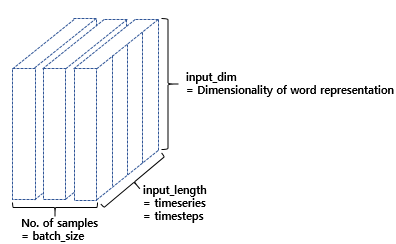

### 모델 설계하기

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed

model = Sequential()
model.add(LSTM(256, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 39s - loss: 3.0740 - accuracy: 0.1816
Epoch 2/80
84/84 - 39s - loss: 2.7133 - accuracy: 0.2507
Epoch 3/80
84/84 - 38s - loss: 2.3843 - accuracy: 0.3293
Epoch 4/80
84/84 - 39s - loss: 2.2478 - accuracy: 0.3627
Epoch 5/80
84/84 - 40s - loss: 2.1503 - accuracy: 0.3861
Epoch 6/80
84/84 - 39s - loss: 2.0634 - accuracy: 0.4051
Epoch 7/80
84/84 - 39s - loss: 1.9914 - accuracy: 0.4245
Epoch 8/80
84/84 - 39s - loss: 1.9304 - accuracy: 0.4413
Epoch 9/80
84/84 - 38s - loss: 1.8748 - accuracy: 0.4559
Epoch 10/80
84/84 - 39s - loss: 1.8275 - accuracy: 0.4690
Epoch 11/80
84/84 - 40s - loss: 1.7821 - accuracy: 0.4827
Epoch 12/80
84/84 - 42s - loss: 1.7404 - accuracy: 0.4935
Epoch 13/80
84/84 - 41s - loss: 1.7039 - accuracy: 0.5035
Epoch 14/80
84/84 - 39s - loss: 1.6685 - accuracy: 0.5128
Epoch 15/80
84/84 - 39s - loss: 1.6350 - accuracy: 0.5218
Epoch 16/80
84/84 - 39s - loss: 1.6024 - accuracy: 0.5294
Epoch 17/80
84/84 - 39s - loss: 1.5715 - accuracy: 0.5363
Epoch 18/80
84/84 - 39s

In [68]:
def sentence_generation(model, length):
    ix = [np.random.randint(vocab_size)] # 글자에 대한 랜덤 인덱스 생성
    y_char = [index_to_char[ix[-1]]] # 랜덤 익덱스로부터 글자 생성
    print(ix[-1],'번 글자',y_char[-1],'로 예측을 시작!')
    X = np.zeros((1, length, vocab_size)) # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성

    for i in range(length):
        X[0][i][ix[-1]] = 1 # X[0][i][예측한 글자의 인덱스] = 1, 즉, 예측 글자를 다음 입력 시퀀스에 추가
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)
sentence_generation(model, 100)

3 번 글자 # 로 예측을 시작!
#

InvalidArgumentError: ignored

# 글자 단위 RNN(Char RNN)으로 텍스트 생성하기

### 데이터에 대한 이해와 전처리

In [65]:
import numpy as np
import tensorflow as tf
to_categorical = tf.keras.utils.to_categorical

text='''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

# 위의 텍스트에 존재하는 단락 구분을 없애고 하나의 문자열로 재저장
tokens = text.split() # '\n 제거'
text = ' '.join(tokens)
print(text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


##### 단락이 없어지고 하나의 문자열로 재저장됨

In [67]:
# 글자 집합 만들기
char_vocab = sorted(list(set(text))) # 중복을 제거한 글자 집합 생성
print(char_vocab)
# 알파벳 또는 구두점 등의 단위의 집합인 글자 집합 생성됨

vocab_size=len(char_vocab)
print ('글자 집합의 크기 : {}'.format(vocab_size))
# 글자 집합의 크기 : 33

char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 글자에 고유한 정수 인덱스 부여
print(char_to_index)

[' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
글자 집합의 크기 : 33
{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


# 훈련에 사용할 문장 샘플 만들기
# Example) 5개의 입력 글자 시퀀스로부터 다음 글자 시퀀스를 예측. 즉, RNN의 time step은 5번
##### stude -> n 
##### tuden -> t

In [66]:
# 훈련에 사용할 문장 샘플 만들기
# Example) 5개의 입력 글자 시퀀스로부터 다음 글자 시퀀스를 예측. 즉, RNN의 time step은 5번
stude -> n 
tuden -> t

SyntaxError: ignored

In [ ]:
# 입력 시퀀스의 길이, 모든 샘플들의 길이가 10이 되도록 데이터를 구성
# 예측 대상이 되는 글자도 필요하므로 우선 길이가 11이 되도록 데이터를 구성
length = 11
sequences = []
for i in range(length, len(text)):
    seq = text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))
# 총 훈련 샘플의 수 :

sequences[:10]

In [ ]:
# char_to_index를 사용하여 전체 데이터에 대해서 정수 인코딩을 수행

X = []
for line in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    temp_X = [char_to_index[char] for char in line] # 문장 샘플에서 각 글자에 대해서 정수 인코딩을 수행.
    X.append(temp_X)

for line in X[:5]:
    print(line)

# 글자 분리시켜주는 작업
sequences = np.array(x)
X = sequences[:,:-1]
y = sequences[:,-1] # 맨 마지막 위치의 글자를 분리

for line in X[:5]:
  print(line)

In [ ]:
# X와 y에 대해서 원-핫 인코딩 수행
sequences = [to_categorical(x, num_classes=vocab_size) for x in X] # X에 대한 원-핫 인코딩
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size) # y에 대한 원-핫 인코딩

print(X.shape)
# 현재 X의 크기는 426 * 10 * 33

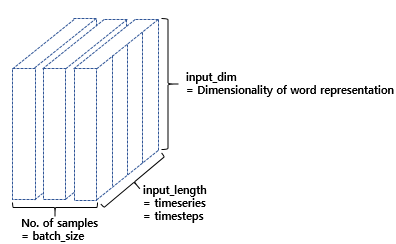

### 모델 설계하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = Sequential()
model.add(LSTM(80, input_shape=(X.shape[1], X.shape[2]))) # X.shape[1]은 25, X.shape[2]는 33
model.add(Dense(vocab_size, activation='softmax'))

##### LSTM을 사용하고, 은닉 상태의 크기는 80, 그리고 출력층에 단어 집합의 크기만큼의 뉴런을 배치하여 모델을 설계



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=2)
# 출력층의 활성화 함수로는 소프트맥스 함수, 손실 함수로는 크로스 엔트로피 함수를 사용

# 문장을 생성하는 함수 sentence_generation를 만들어서 문장을 생성
def sentence_generation(model, char_to_index, seq_length, seed_text, n):
# 모델, 인덱스 정보, 문장 길이, 초기 시퀀스, 반복 횟수
    init_text = seed_text # 문장 생성에 사용할 초기 시퀀스
    sentence = ''

    for _ in range(n): # n번 반복
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))
        result = model.predict_classes(encoded, verbose=0)
        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 글자)를 result에 저장.
        for char, index in char_to_index.items(): # 만약 예측한 글자와 인덱스와 동일한 글자가 있다면
            if index == result: # 해당 글자가 예측 글자이므로 break
                break
        seed_text=seed_text + char # 현재 시퀀스 + 예측 글자를 현재 시퀀스로 변경
        sentence=sentence + char # 예측 글자를 문장에 저장
        # for문이므로 이 작업을 다시 반복

    sentence = init_text + sentence
    return sentence
print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))
